In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
plt.rcParams['font.size']=25

In [2]:
# DATA NO HYDRATE
krg_nohydrate=[0, .021, .048, .08, .11, .29 ,.93]; 
krw_nohydrate=[1,.45,.38, .34, .15, .02, 0]; 

fw1=[1,.74, .5, .25, .1, .01, 0,]; 
fg1=[0, .26, .5, .75, .9, .99, 1];

In [3]:
# DATA with hydrate
fw2=[0,.12, .45, .63, .95, 1];
fg2=[1,.88, .55, .37, .05, 0];
Sg2=[.315,.2033,.13347,.0419,0]
krg_hydrate=[.15,.03149, .01037,.00761, 6.94e-4, 0]
krw_hydrate=[0,.0378, .108, .1296, .1523, .19];

In [4]:
# SWI (no hydrate)
nw=3.8;
ng=2.2;
Srw=0;
Srg=0;
Sw0=np.linspace(0,1,100);


for i in Sw0:
    Sg0=1-Sw0-Srw
    krw_h0=((Sw0-Srw)/(1-Srw))**nw
    krg_h0=((Sg0-Srg)/(1-Srg))**ng 
    fw_h0=krw_h0/(krw_h0+krg_h0/.1)
    fg_h0=1-fw_h0 


In [5]:
# SWI (with hydrate)
Sh=.3
nw=3.8;
ng=2.2
Srw=0;
Srg=0;

Sw_eff=np.linspace(0,1,100)
Sw25=np.linspace(0,1-Sh,100)

for i in Sw25:
    Sg_eff=1-Sw_eff
    Sg25=1-Sw25-Sh
    krw_h25=((Sw25-Srw)/(1-Srw))**nw
    krg_h25=((Sh/(1-Sg25))*((Sg25-Srg)/(1-Srg))**nw)+((1-(Sh/(1-Sg25)))*((Sg25-Srg)/(1-Srg))**ng)
    krg_25_int=((Sg25-Srg)/(1-Srg))**ng
    fw_h25=krw_h25/(krw_h25+krg_h25/.1)
    fg_h25=1-fw_h25
    

In [6]:
#Solve for saturation
for i in krw_hydrate:
    Sw2=np.power((krw_hydrate),(1/nw))*(1-Srw)+Srw
    Sw2_eff=Sw2/(1-Sh)
    
for i in krg_nohydrate:
    Sg1=np.power((krg_nohydrate),(1/ng))*(1-Srg)+Srg
    
for i in krw_nohydrate:
    Sw1=np.power((krw_nohydrate),(1/nw))*(1-Srw)+Srw
    

In [7]:
# SOLID MODEL  SH = 30!! 
Sh=.3
nw=4;
ng=2;
Srw=0;
Srg=0;

Sw_eff=np.linspace(0,1,100)
Sw_s25=np.linspace(0,1-Sh,100)

for i in Sw_s25:
    Sg_eff=1-Sw_eff
    Sg_s25=1-Sw_s25
    krw_s25=(((Sw_eff-Srw)/(1-Srw))**nw)*(Sw_eff/(1-Sh))
    krg_s25=(((Sg_eff-Srg)/(1-Srw))**ng)*(Sg_eff/(1-Sh))
    krw_gc=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh)**2
    krg_gc=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh)**2
    krw_pf=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    krg_pf=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    fw_gc=krw_gc/(krw_gc+krg_gc/.1)
    fg_gc=1-fw_gc
    fw_pf=krw_pf/(krw_pf+krg_pf/.1)
    fg_pf=1-fw_pf

## Data ONLY

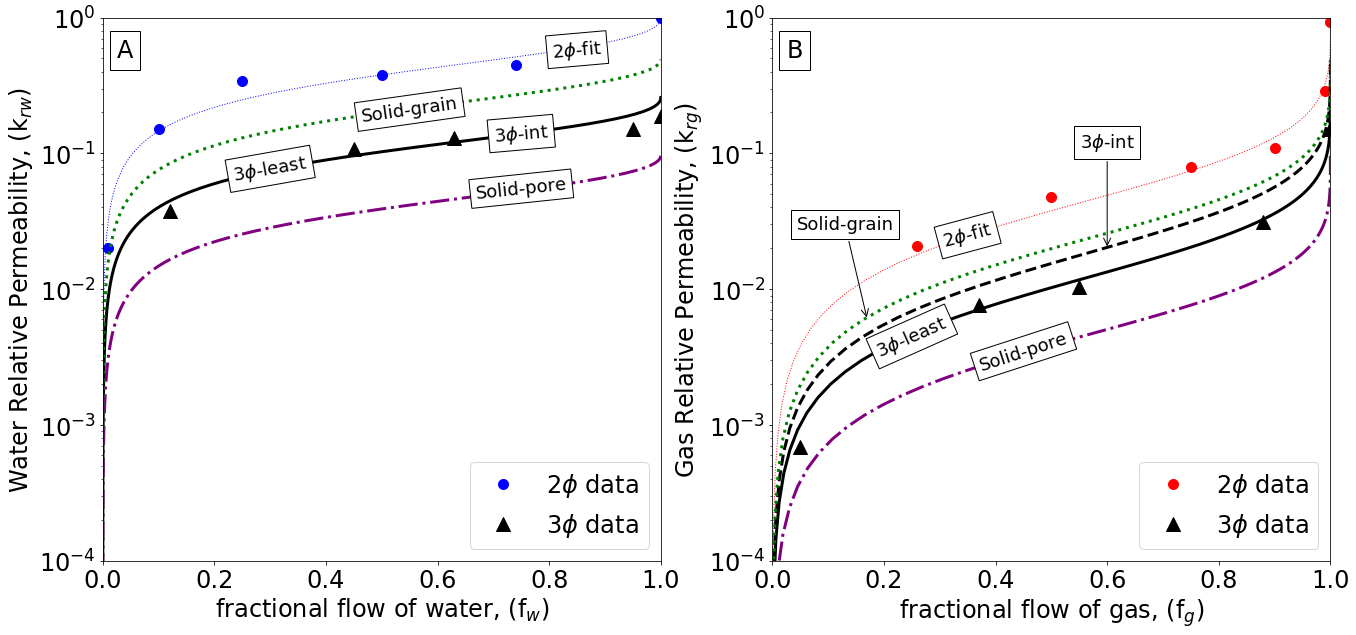

In [8]:
fig=plt.figure(figsize=(22,10))
plt.rcParams['font.size']=24
sharex='True'

plt1=fig.add_subplot(1,2,1)

plt1.semilogy(fw1,krw_nohydrate,'o',markersize=10,color='blue',label='${2\phi}$ data')
plt1.semilogy(fw_h0,krw_h0,':',linewidth=1,color='blue')#,label='k$_{rw}^{2\phi}$')
plt1.semilogy(fw2,krw_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt1.semilogy(fw_h25,krw_h25,'-',linewidth=3,color='black')#,label='${3\phi}$: int or least')
plt1.semilogy(fw_pf,krw_pf,'-.',linewidth=3,color='purple')#,label='Solid: pore')
plt1.semilogy(fw_gc,krw_gc,':',linewidth=3,color='green')#,label='Solid: grain')

plt.xlabel('fractional flow of water, (f$_w$)',fontsize=24)
plt.xlim([0,1])
plt.ylabel('Water Relative Permeability, (k$_{rw}$)',fontsize=24)
plt.ylim([0.0001,1])

plt.legend(fontsize=24,loc='lower right')


plt3=fig.add_subplot(1,2,2)
plt3.semilogy(fg1,krg_nohydrate,'o',markersize=10,color='red',label='${2\phi}$ data')
plt3.semilogy(fg_h0,krg_h0,':',linewidth=1,color='red')#,label='${2\phi}$-fit')
plt3.semilogy(fg2,krg_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt3.semilogy(fg_h25,krg_h25,'-',linewidth=3,color='black')#,label='${3\phi}$-least')
plt3.semilogy(fg_h25,krg_25_int,'--',linewidth=3,color='black')#,label='${3\phi}$-int')
plt3.semilogy(fg_pf,krg_pf,'-.',linewidth=3,color='purple')#,label='Solid-pore')
plt3.semilogy(fg_gc,krg_gc,':',linewidth=3,color='green')#,label='Solid-grain')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)',fontsize=24)
plt.ylim([.0001,1])
plt.ylabel('Gas Relative Permeability, (k$_{rg}$)',fontsize=24)
#fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=18, ha='center', va='center', rotation='vertical')

plt.legend(loc='lower right',fontsize=24)


plt1.annotate("A",xy=(.04,.57), xycoords='data',
                 size=24, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("${2\phi}$-fit",xy=(.85,.58), xycoords='data',
                 size=18, va="center", ha="center",rotation=5,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("${3\phi}$-int",xy=(.75,.14), xycoords='data',
                 size=18, va="center", ha="center",rotation=5,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("${3\phi}$-least",xy=(.3,.077), xycoords='data',
                 size=18, va="center", ha="center",rotation=10,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("Solid-pore",xy=(.75,.055), xycoords='data',
                 size=18, va="center", ha="center",rotation=6,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("Solid-grain",xy=(.55,.21), xycoords='data',
                 size=18, va="center", ha="center",rotation=8,
                bbox=dict(boxstyle="square", fc="w"))

## FIG 2

plt3.annotate("${2\phi}$-fit",xy=(.35,.025), xycoords='data',
                 size=18, va="center", ha="center",rotation=15,
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("${3\phi}$-int",xy=(.6,.02),xytext=(0.6, 0.12),xycoords='data',
                 size=18, va="center", ha="center",rotation=0,
                arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("${3\phi}$-least",xy=(.25,.0045), xycoords='data',
                 size=18, va="center", ha="center",rotation=24,
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("Solid-grain",xy=(.17,.006), xytext=(0.13, 0.03),xycoords='data',
                 size=18, va="center", ha="center",rotation=0,
                arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))


plt3.annotate("Solid-pore",xy=(.45,.0035), xycoords='data',
                 size=18, va="center", ha="center",rotation=18,
                bbox=dict(boxstyle="square", fc="w"))


plt3.annotate("B",xy=(.04,.57), xycoords='data',
                 size=24, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))


dpi_value = 300
#plt.savefig('Figure4.jpg', dpi=dpi_value, format='jpeg')

plt.show()

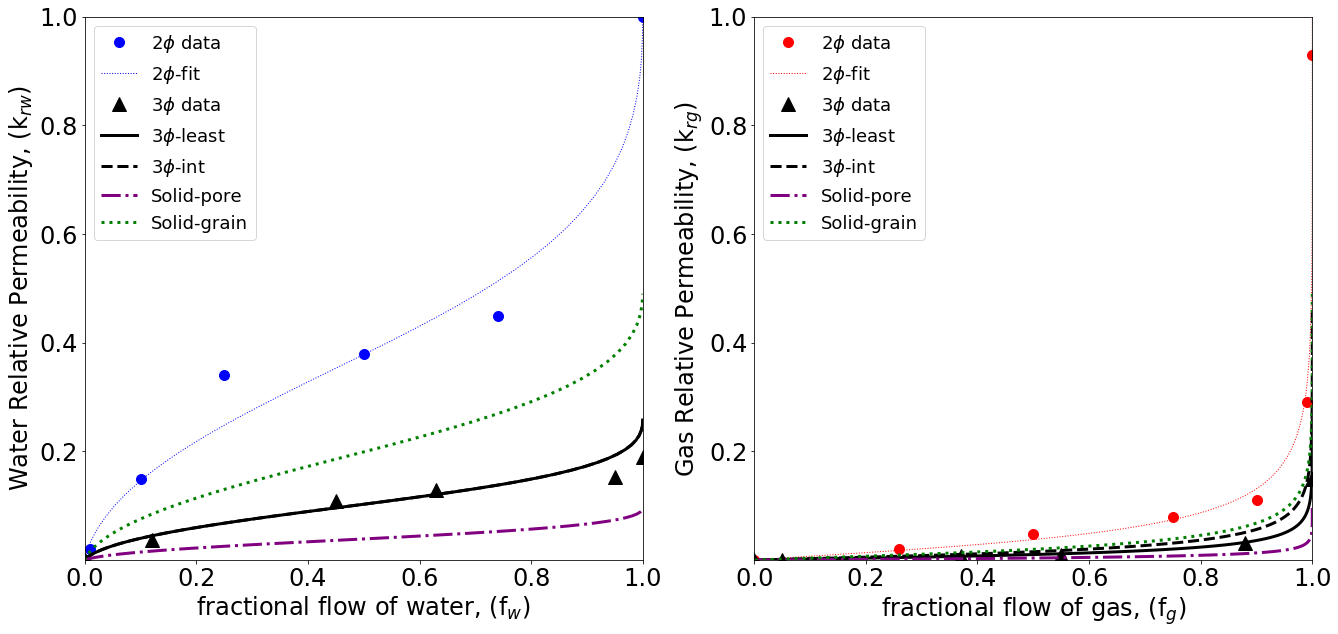

In [12]:
#LINEAR 
fig=plt.figure(figsize=(22,10))
plt.rcParams['font.size']=24
sharex='True'

plt1=fig.add_subplot(1,2,1)

plt1.plot(fw1,krw_nohydrate,'o',markersize=10,color='blue',label='${2\phi}$ data')
plt1.plot(fw_h0,krw_h0,':',linewidth=1,color='blue',label='${2\phi}$-fit')
plt1.plot(fw2,krw_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt1.plot(fw_h25,krw_h25,'-',linewidth=3,color='black',label='${3\phi}$-least')
plt1.plot(fw_h25,krw_h25,'--',linewidth=3,color='black',label='${3\phi}$-int')
plt1.plot(fw_pf,krw_pf,'-.',linewidth=3,color='purple',label='Solid-pore')
plt1.plot(fw_gc,krw_gc,':',linewidth=3,color='green',label='Solid-grain')

plt.xlabel('fractional flow of water, (f$_w$)',fontsize=24)
plt.xlim([0,1])
plt.ylabel('Water Relative Permeability, (k$_{rw}$)',fontsize=24)
plt.ylim([0.0001,1])

plt.legend(loc='upper left',fontsize=18)


#fig.text(0.08, 0.7, 'Water Relative Permeability, (k$_{rw}$)',fontsize=18, ha='center', va='center', rotation='vertical')


plt3=fig.add_subplot(1,2,2)
plt3.plot(fg1,krg_nohydrate,'o',markersize=10,color='red',label='${2\phi}$ data')
plt3.plot(fg_h0,krg_h0,':',linewidth=1,color='red',label='${2\phi}$-fit')
plt3.plot(fg2,krg_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt3.plot(fg_h25,krg_h25,'-',linewidth=3,color='black',label='${3\phi}$-least')
plt3.plot(fg_h25,krg_25_int,'--',linewidth=3,color='black',label='${3\phi}$-int')
plt3.plot(fg_pf,krg_pf,'-.',linewidth=3,color='purple',label='Solid-pore')
plt3.plot(fg_gc,krg_gc,':',linewidth=3,color='green',label='Solid-grain')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)',fontsize=24)
plt.ylim([.0001,1])
plt.ylabel('Gas Relative Permeability, (k$_{rg}$)',fontsize=24)
#fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=18, ha='center', va='center', rotation='vertical')

plt.legend(loc='upper left',fontsize=18)


# plt1.annotate("A",xy=(.04,.57), xycoords='data',
#                  size=24, va="center", ha="center",
#                 bbox=dict(boxstyle="square", fc="w"))

# plt1.annotate("${2\phi}$-fit",xy=(.85,.58), xycoords='data',
#                  size=18, va="center", ha="center",rotation=5,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt1.annotate("${3\phi}$-int",xy=(.75,.14), xycoords='data',
#                  size=18, va="center", ha="center",rotation=5,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt1.annotate("${3\phi}$-least",xy=(.3,.077), xycoords='data',
#                  size=18, va="center", ha="center",rotation=10,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt1.annotate("Solid-pore",xy=(.75,.055), xycoords='data',
#                  size=18, va="center", ha="center",rotation=6,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt1.annotate("Solid-grain",xy=(.55,.21), xycoords='data',
#                  size=18, va="center", ha="center",rotation=8,
#                 bbox=dict(boxstyle="square", fc="w"))

## FIG 2

# plt3.annotate("${2\phi}$-fit",xy=(.35,.025), xycoords='data',
#                  size=18, va="center", ha="center",rotation=15,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt3.annotate("${3\phi}$-int",xy=(.6,.02),xytext=(0.6, 0.12),xycoords='data',
#                  size=18, va="center", ha="center",rotation=0,
#                 arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))

# plt3.annotate("${3\phi}$-least",xy=(.25,.0045), xycoords='data',
#                  size=18, va="center", ha="center",rotation=24,
#                 bbox=dict(boxstyle="square", fc="w"))

# plt3.annotate("Solid-grain",xy=(.17,.006), xytext=(0.13, 0.03),xycoords='data',
#                  size=18, va="center", ha="center",rotation=0,
#                 arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))


# plt3.annotate("Solid-pore",xy=(.45,.0035), xycoords='data',
#                  size=18, va="center", ha="center",rotation=18,
#                 bbox=dict(boxstyle="square", fc="w"))


# plt3.annotate("B",xy=(.04,.57), xycoords='data',
#                  size=24, va="center", ha="center",
#                 bbox=dict(boxstyle="square", fc="w"))


dpi_value = 300
#plt.savefig('Figure4.jpg', dpi=dpi_value, format='jpeg')

plt.show()

## WITH DATA

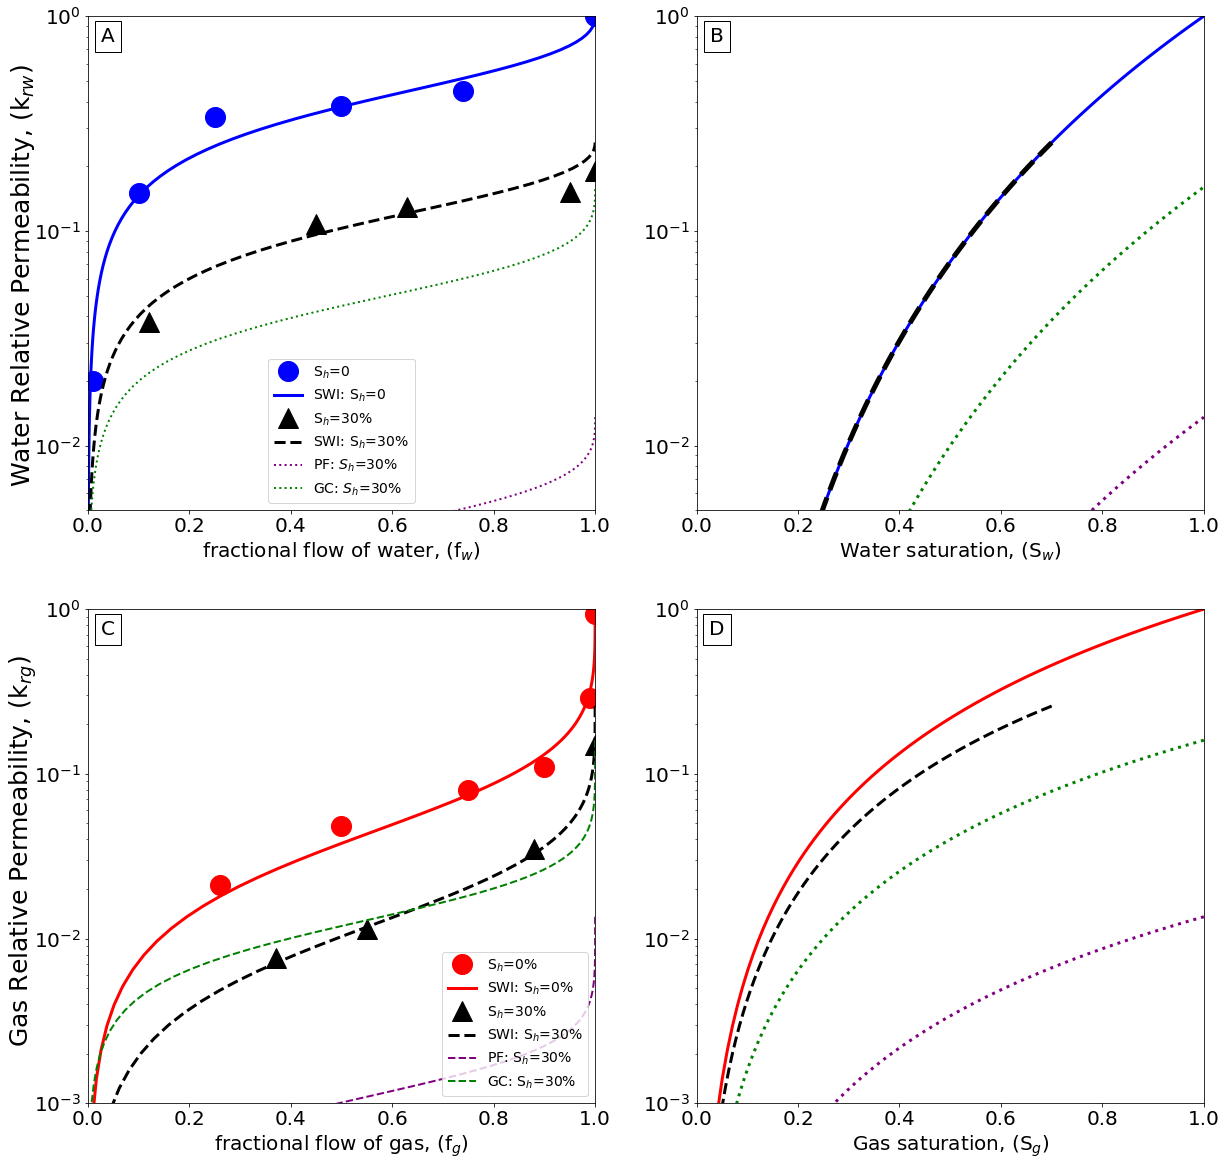

In [29]:
fig=plt.figure(figsize=(20,20))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(2,2,1)

plt1.semilogy(fw1,krw_nohydrate,'o',markersize=20,color='blue',label='S$_h$=0')
plt1.semilogy(fw_h0,krw_h0,'-',linewidth=3,color='blue',label='SWI: S$_h$=0')
plt1.semilogy(fw2,krw_hydrate,'^',markersize=20,color='black',label='S$_h$=30%')
plt1.semilogy(fw_h25,krw_h25,'--',linewidth=3,color='black',label='SWI: S$_h$=30%')
plt1.semilogy(fw_s25,krw_pf,':',linewidth=2,color='purple',label='PF: $S_h$=30%')
plt1.semilogy(fw_s25,krw_gc,':',linewidth=2,color='green',label='GC: $S_h$=30%')
plt.legend(fontsize=14)

plt.xlabel('fractional flow of water, (f$_w$)')
plt.xlim([0,1])
#plt.ylabel('realtive permeability of water, (k$_{rw}$)')
plt.ylim([0.005,1])

plt2=fig.add_subplot(2,2,2)

plt2.semilogy(Sw0,krw_h0,'-',linewidth=3,color='blue')
#plt2.semilogy(Sw1,krw_nohydrate,'o',markersize=20,color='blue',label='Sh=0%')
plt2.semilogy(Sw25,krw_h25,'--',linewidth=5,color='black')
#plt2.semilogy(Sw2,krw_hydrate,'^',markersize=20,color='black',label='Sh=25%')
plt2.semilogy(Sw_eff,krw_pf,':',linewidth=3,color='purple')
plt2.semilogy(Sw_eff,krw_gc,':',linewidth=3,color='green')

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,1])
plt.ylim([0.005,1])

#plt.legend()

fig.text(0.08, 0.7, 'Water Relative Permeability, (k$_{rw}$)',fontsize=25, ha='center', va='center', rotation='vertical')


plt3=fig.add_subplot(2,2,3)
plt3.semilogy(fg1,krg_nohydrate,'o',markersize=20,color='red',label='S$_h$=0%')
plt3.semilogy(fg_h0,krg_h0,'-',linewidth=3,color='red',label='SWI: S$_h$=0%')
plt3.semilogy(fg2,krg_hydrate,'^',markersize=20,color='black',label='S$_h$=30%')
plt3.semilogy(fg_h25,krg_h25,'--',linewidth=3,color='black',label='SWI: S$_h$=30%')
plt3.semilogy(fg_s25,krg_pf,'--',linewidth=2,color='purple',label='PF: S$_h$=30%')
plt3.semilogy(fg_s25,krg_gc,'--',linewidth=2,color='green',label='GC: S$_h$=30%')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)')
plt.ylim([.001,1])
#plt.ylabel('Gas relative permeability, (k$_{rg}$)')
fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=25, ha='center', va='center', rotation='vertical')

plt.legend(loc='lower right',fontsize=14)

plt4=fig.add_subplot(2,2,4)
plt4.semilogy(Sg0,krg_h0,'-',linewidth=3,color='red')
#plt4.semilogy(Sg1,krg_nohydrate,'o',markersize=20,color='red',label='Sh=0%')
plt4.semilogy(Sg25,krg_h25,'--',linewidth=3,color='black')
#plt4.semilogy(Sg2,krg_hydrate,'^',markersize=20,color='black',label='Sh=25%')
plt4.semilogy(Sg_eff,krg_pf,':',linewidth=3,color='purple')
plt4.semilogy(Sg_eff,krg_gc,':',linewidth=3,color='green')


plt.xlim([0,1])
plt.xlabel('Gas saturation, (S$_g$)')
plt.ylim([.001,1])

plt1.annotate("A",xy=(.04,.8), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt2.annotate("B",xy=(.04,.8), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("C",xy=(.04,.75), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt4.annotate("D",xy=(.04,.75), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

dpi_value = 300
plt.savefig('Figure4.jpg', dpi=dpi_value, format='jpeg')

plt.show()

C:\Users\zwm96\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


NameError: name 'krg_25' is not defined

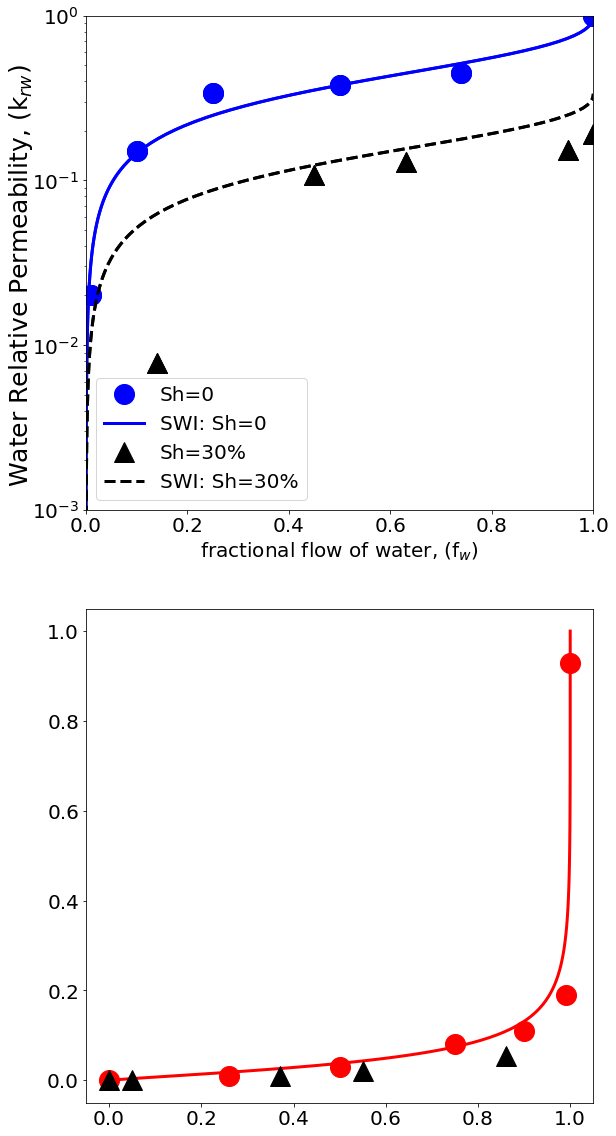

In [9]:
fig=plt.figure(figsize=(20,20))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(2,2,1)

plt1.plot(fw1,krw_nohydrate,'o',markersize=20,color='blue',label='Sh=0')
plt1.plot(fw_h0,krw_h0,'-',linewidth=3,color='blue',label='SWI: Sh=0')
plt1.plot(fw2,krw_hydrate,'^',markersize=20,color='black',label='Sh=30%')
plt1.plot(fw_h25,krw_h25,'--',linewidth=3,color='black',label='SWI: Sh=30%')

plt.legend()

plt.xlabel('fractional flow of water, (f$_w$)')
plt.xlim([0,1])
#plt.ylabel('realtive permeability of water, (k$_{rw}$)')
plt.ylim([0,1])

plt2=fig.add_subplot(2,2,1)
plt2.semilogy(fw_h0,krw_h0,'-',linewidth=3,color='blue')
plt2.semilogy(fw1,krw_nohydrate,'o',markersize=20,color='blue',label='Sh=0%')
plt2.semilogy(fw_h25,krw_h25,'--',linewidth=3,color='black')
plt2.semilogy(fw2,krw_hydrate,'^',markersize=20,color='black',label='Sh=25%')

plt.xlabel('fractional flow of water, (f$_w$)')
plt.xlim([0,1])

plt.ylim([0.001,1])
#plt.legend()

fig.text(0.08, 0.7, 'Water Relative Permeability, (k$_{rw}$)',fontsize=25, ha='center', va='center', rotation='vertical')


plt3=fig.add_subplot(2,2,3)
plt3.plot(fg1,krg_nohydrate,'o',markersize=20,color='red',label='Sh=0')
plt3.plot(fg_h0,krg_h0,'-',linewidth=3,color='red',label='SWI: Sh=0')
plt3.plot(fg2,krg_hydrate,'^',markersize=20,color='black',label='Sh=25%')
plt3.plot(fg_h25,krg_25,'--',linewidth=3,color='black',label='SWI: Sh=25%')
#plt3.plot(fg_s25,krg_gc,'-',linewidth=3,color='green',label='GC: Sh=0.25')
#plt3.plot(fg_s25,krg_pf,':',linewidth=3,color='green',label='PF: Sh=0.25')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)')
plt.ylim([0,1])
#plt.ylabel('realtive permeability of gas, (k$_{rg}$)')
fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=25, ha='center', va='center', rotation='vertical')

plt.legend(loc='upper left')

plt4=fig.add_subplot(2,2,4)
plt4.semilogy(fg_h0,krg_h0,'-',linewidth=3,color='red')
plt4.semilogy(fg1,krg_nohydrate,'o',markersize=20,color='red',label='Sh=0%')
plt4.semilogy(fg_h25,krg_25,'--',linewidth=3,color='black')
plt4.semilogy(fg2,krg_hydrate,'^',markersize=20,color='black',label='Sh=25%')
#plt4.semilogy(fg_s25,krg_gc,'-',linewidth=3,color='green')
#plt4.semilogy(fg_s25,krg_pf,':',linewidth=3,color='green')

plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)')
plt.ylim([.00001,1])
#plt.ylabel('realtive permeability of gas, (k$_{rg}$)')

#plt.legend(loc='upper left')

#plt.annotate("SWI: S$_H$=0",xy=(.35, 0.025), xycoords='data',
              #    xytext=(.35, 0.1), textcoords='data',
                #  size=20, va="center", ha="center",
                #  bbox=dict(boxstyle="square", fc="w"),
                #  arrowprops=dict(arrowstyle="simple",fc="k"),)


#plt.annotate("SWI: S$_H$=25%",xy=(.75, 0.0075), xycoords='data',
                #    xytext=(.75, 0.001), textcoords='data',
                #  size=20, va="center", ha="center",rotation=0,
            #   #   bbox=dict(boxstyle="square", fc="w"),
            #  arrowprops=dict(arrowstyle="simple",fc="k"),)

#plt.annotate("Solid: S$_H$=25%",xy=(.6, 0.025), xycoords='data',
                #    xytext=(.6, 0.3), textcoords='data',
                  #size=20, va="center", ha="center",rotation=0,
               #   bbox=dict(boxstyle="square", fc="w"),
             # arrowprops=dict(arrowstyle="simple",fc="k"),)

In [ ]:
fig=plt.figure(figsize=(20,20))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(2,2,1)

plt1.semilogy(fw1,krw_nohydrate,'o',markersize=20,color='blue',label='S$_h$=0')
plt1.semilogy(fw_h0,krw_h0,'-',linewidth=3,color='blue',label='SWI: S$_h$=0')
plt1.semilogy(fw2,krw_hydrate,'^',markersize=20,color='black',label='S$_h$=30%')
plt1.semilogy(fw_h25,krw_h25,'--',linewidth=3,color='black',label='SWI: S$_h$=30%')
plt1.semilogy(fw_s25,krw_pf,':',linewidth=2,color='purple',label='PF: $S_h$=30%')
plt1.semilogy(fw_s25,krw_gc,':',linewidth=2,color='green',label='GC: $S_h$=30%')
plt.legend(fontsize=14)

plt.xlabel('fractional flow of water, (f$_w$)')
plt.xlim([0,1])
#plt.ylabel('realtive permeability of water, (k$_{rw}$)')
plt.ylim([0.005,1])

plt2=fig.add_subplot(2,2,2)

plt2.semilogy(Sw0,krw_h0,'-',linewidth=3,color='blue')
#plt2.semilogy(Sw1,krw_nohydrate,'o',markersize=20,color='blue',label='Sh=0%')
plt2.semilogy(Sw25,krw_h25,'--',linewidth=5,color='black')
#plt2.semilogy(Sw2,krw_hydrate,'^',markersize=20,color='black',label='Sh=25%')
plt2.semilogy(Sw_eff,krw_pf,':',linewidth=3,color='purple')
plt2.semilogy(Sw_eff,krw_gc,':',linewidth=3,color='green')

plt.xlabel('Water saturation, (S$_w$)')
plt.xlim([0,1])
plt.ylim([0.005,1])

#plt.legend()

fig.text(0.08, 0.7, 'Water Relative Permeability, (k$_{rw}$)',fontsize=25, ha='center', va='center', rotation='vertical')


plt3=fig.add_subplot(2,2,3)
plt3.semilogy(fg1,krg_nohydrate,'o',markersize=20,color='red',label='S$_h$=0%')
plt3.semilogy(fg_h0,krg_h0,'-',linewidth=3,color='red',label='SWI: S$_h$=0%')
plt3.semilogy(fg2,krg_hydrate,'^',markersize=20,color='black',label='S$_h$=30%')
plt3.semilogy(fg_h25,krg_h25,'--',linewidth=3,color='black',label='SWI: S$_h$=30%')
plt3.semilogy(fg_s25,krg_pf,'--',linewidth=2,color='purple',label='PF: S$_h$=30%')
plt3.semilogy(fg_s25,krg_gc,'--',linewidth=2,color='green',label='GC: S$_h$=30%')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)')
plt.ylim([.001,1])
#plt.ylabel('Gas relative permeability, (k$_{rg}$)')
fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=25, ha='center', va='center', rotation='vertical')

plt.legend(loc='lower right',fontsize=14)

plt4=fig.add_subplot(2,2,4)
plt4.semilogy(Sg0,krg_h0,'-',linewidth=3,color='red')
#plt4.semilogy(Sg1,krg_nohydrate,'o',markersize=20,color='red',label='Sh=0%')
plt4.semilogy(Sg25,krg_h25,'--',linewidth=3,color='black')
#plt4.semilogy(Sg2,krg_hydrate,'^',markersize=20,color='black',label='Sh=25%')
plt4.semilogy(Sg_eff,krg_pf,':',linewidth=3,color='purple')
plt4.semilogy(Sg_eff,krg_gc,':',linewidth=3,color='green')


plt.xlim([0,1])
plt.xlabel('Gas saturation, (S$_g$)')
plt.ylim([.001,1])

plt1.annotate("A",xy=(.04,.8), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt2.annotate("B",xy=(.04,.8), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("C",xy=(.04,.75), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

plt4.annotate("D",xy=(.04,.75), xycoords='data',
                 size=20, va="center", ha="center",
                bbox=dict(boxstyle="square", fc="w"))

dpi_value = 300
plt.savefig('Figure4.jpg', dpi=dpi_value, format='jpeg')

plt.show()

Text(0.6, 0.3, 'Solid: S$_H$=25%')

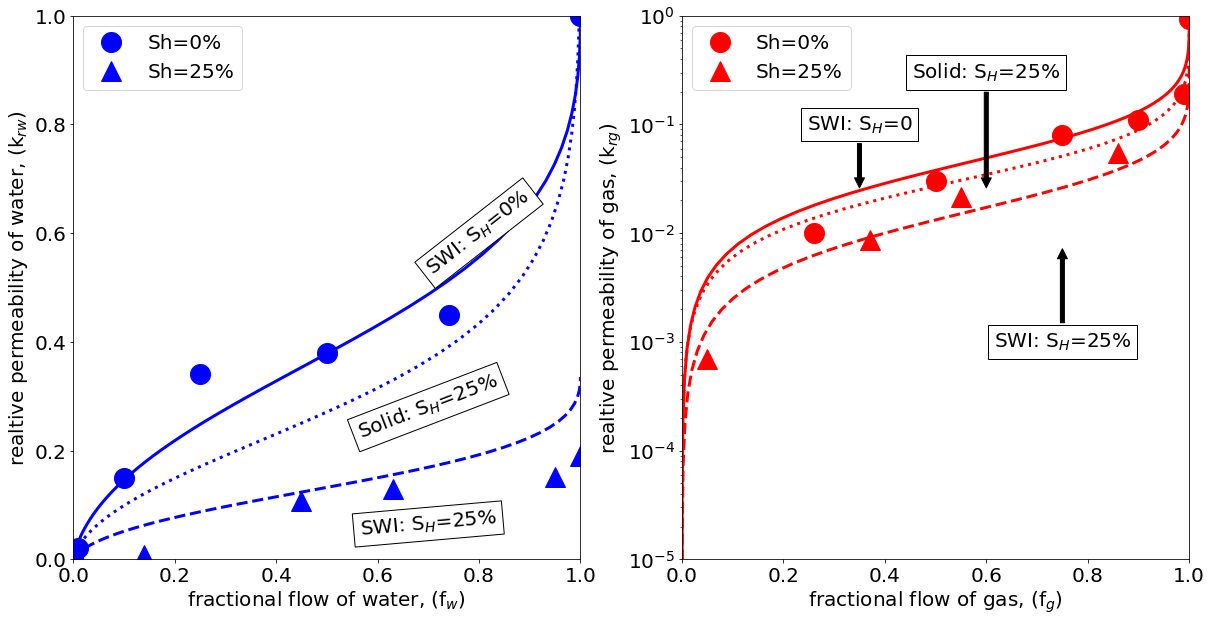

In [10]:
fig=plt.figure(figsize=(20,10))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(1,2,1)
plt1.plot(fw_h0,krw_h0,'-',linewidth=3,color='blue')
plt1.plot(fw1,krw_nohydrate,'o',markersize=20,color='blue',label='Sh=0%')
plt1.plot(fw_h25,krw_h25,'--',linewidth=3,color='blue')
plt1.plot(fw2,krw_hydrate,'^',markersize=20,color='blue',label='Sh=25%')
plt1.plot(fw_s25,krw_s25,':',linewidth=3,color='blue')

plt.annotate("SWI: S$_H$=0%",xy=(.8, 0.6), xycoords='data',
                  size=20, va="center", ha="center",rotation=38,
                  bbox=dict(boxstyle="square", fc="w"),)

plt.annotate("SWI: S$_H$=25%",xy=(.7, 0.065), xycoords='data',
                  size=20, va="center", ha="center",rotation=5,
                  bbox=dict(boxstyle="square", fc="w"),)

plt.annotate("Solid: S$_H$=25%",xy=(.7, 0.28), xycoords='data',
                  size=20, va="center", ha="center",rotation=21,
                  bbox=dict(boxstyle="square", fc="w"),)
plt.legend()

plt.xlabel('fractional flow of water, (f$_w$)')
plt.xlim([0,1])
plt.ylabel('realtive permeability of water, (k$_{rw}$)')
plt.ylim([0,1])

plt2=fig.add_subplot(1,2,2)
plt2.semilogy(fg_h0,krg_h0,'-',linewidth=3,color='red')
plt2.semilogy(fg1,krg_nohydrate,'o',markersize=20,color='red',label='Sh=0%')
plt2.semilogy(fg_h25,krg_h25,'--',linewidth=3,color='red')
plt2.semilogy(fg2,krg_hydrate,'^',markersize=20,color='red',label='Sh=25%')
plt2.plot(fg_s25,krg_s25,':',linewidth=3,color='red')

plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)')
plt.ylim([.00001,1])
plt.ylabel('realtive permeability of gas, (k$_{rg}$)')

plt.legend(loc='upper left')

plt.annotate("SWI: S$_H$=0",xy=(.35, 0.025), xycoords='data',
                  xytext=(.35, 0.1), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="square", fc="w"),
                  arrowprops=dict(arrowstyle="simple",fc="k"),)


plt.annotate("SWI: S$_H$=25%",xy=(.75, 0.0075), xycoords='data',
                    xytext=(.75, 0.001), textcoords='data',
                  size=20, va="center", ha="center",rotation=0,
                  bbox=dict(boxstyle="square", fc="w"),
              arrowprops=dict(arrowstyle="simple",fc="k"),)

plt.annotate("Solid: S$_H$=25%",xy=(.6, 0.025), xycoords='data',
                    xytext=(.6, 0.3), textcoords='data',
                  size=20, va="center", ha="center",rotation=0,
                  bbox=dict(boxstyle="square", fc="w"),
              arrowprops=dict(arrowstyle="simple",fc="k"),)

In [ ]:
# SOLID MODEL (with hydrate)
Sh=.25
nw=4;
ng=2;
Srw=.1;
Srg=0;

Sw_eff=np.linspace(0,1,100)
Sw=np.linspace(0,1-Sh,100)

for i in Sw:
    Sg_eff=1-Sw_eff
    Sg=1-Sw
    krw_s25=(((Sw_eff-Srw)/(1-Srw))**nw)*(Sw/(1-Sh))
    krg_s25=(((Sg_eff-Srg)/(1-Srw))**ng)*(Sg/(1-Sh))
    krw_gc=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh)**2
    krg_gc=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh)**2
    krw_pf=(((Sw_eff-Srw)/(1-Srw))**nw)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    krg_pf=(((Sg_eff-Srg)/(1-Srw))**ng)*(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    fw_s25=krw_s25/(krw_s25+krg_s25/.1)
    fg_s25=1-fw_s25

In [ ]:
# Grain coating/pore filling
Sh=np.linspace(0,1,100)


for i in Sh:
    kr_pf=(1-Sh**2+((2*((1-Sh)**2))/(np.log(Sh))))
    kr_gc=(1-Sh)**2

In [ ]:
# plot pore filling/GC(Sh)

fig=plt.figure(figsize=(10,7))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(1,1,1)
plt1.plot(Sh,kr_pf,'-',linewidth=3,color='black',label='pore filling')
plt1.plot(Sh,kr_gc,'--',linewidth=3,color='black',label='grain coating')

plt.xlabel('Hydrate Saturation')
plt.xlim([0,1])
plt.ylabel('realtive permeability, (k$_{r}$)')
plt.ylim([0,1])
plt.legend()

In [ ]:
# Brooks corey - from liu flemings
Sh=.80
Srw=.1;
Srg=0.02;
Sw=np.linspace(0,1-Sh,100)
Sg=1-Sw-Sh
for i in Sw:
    Sw_eff=Sw/(Sw+Sg)
    Sg_eff=Sg/(Sw+Sg)
    krw=((Sw_eff-Srw)/(1-Srw-Srg))**4
    krg=((1-(Sw_eff-Srw)/(1-Srw-Srg))**2)*(1-((Sw_eff-Srw)/(1-Srw-Srg))**2)

In [ ]:
# plot pore filling

fig=plt.figure(figsize=(10,7))
plt.rcParams['font.size']=20
sharex='True'

plt1=fig.add_subplot(1,1,1)
plt1.plot(Sw_eff,krw,'-',linewidth=3,color='blue',label='water')
plt1.plot(Sg_eff,krg,'-',linewidth=3,color='red',label='gas')

plt.xlabel('Effective Water Saturation, Sw*')
plt.xlim([0,1])
plt.ylabel('realtive permeability, (k$_{r}$)')
plt.ylim([0,1])
plt.legend()

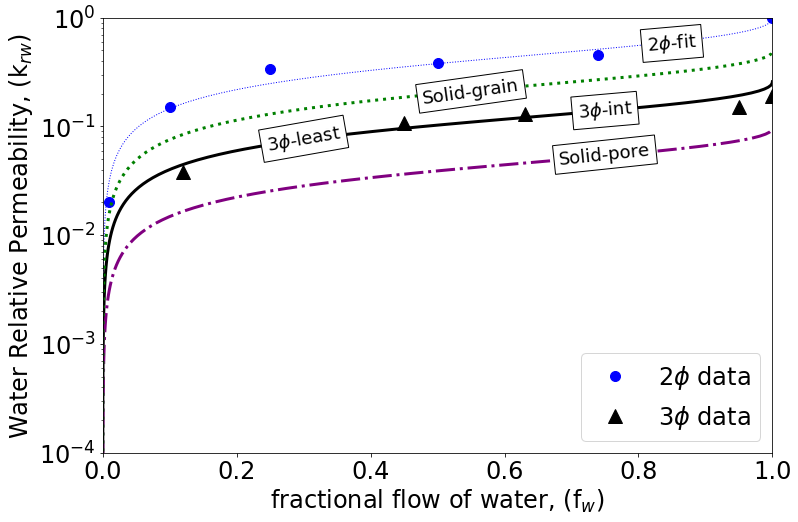

In [23]:
fig=plt.figure(figsize=(12,8))
plt.rcParams['font.size']=24
sharex='True'

plt1=fig.add_subplot(1,1,1)

plt1.semilogy(fw1,krw_nohydrate,'o',markersize=10,color='blue',label='${2\phi}$ data')
plt1.semilogy(fw_h0,krw_h0,':',linewidth=1,color='blue')#,label='k$_{rw}^{2\phi}$')
plt1.semilogy(fw2,krw_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt1.semilogy(fw_h25,krw_h25,'-',linewidth=3,color='black')#,label='${3\phi}$: int or least')
plt1.semilogy(fw_pf,krw_pf,'-.',linewidth=3,color='purple')#,label='Solid: pore')
plt1.semilogy(fw_gc,krw_gc,':',linewidth=3,color='green')#,label='Solid: grain')

plt.xlabel('fractional flow of water, (f$_w$)',fontsize=24)
plt.xlim([0,1])
plt.ylabel('Water Relative Permeability, (k$_{rw}$)',fontsize=24)
plt.ylim([0.0001,1])

plt.legend(fontsize=24,loc='lower right')


#fig.text(0.08, 0.7, 'Water Relative Permeability, (k$_{rw}$)',fontsize=18, ha='center', va='center', rotation='vertical')




plt1.annotate("${2\phi}$-fit",xy=(.85,.58), xycoords='data',
                 size=18, va="center", ha="center",rotation=5,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("${3\phi}$-int",xy=(.75,.14), xycoords='data',
                 size=18, va="center", ha="center",rotation=5,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("${3\phi}$-least",xy=(.3,.077), xycoords='data',
                 size=18, va="center", ha="center",rotation=10,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("Solid-pore",xy=(.75,.055), xycoords='data',
                 size=18, va="center", ha="center",rotation=6,
                bbox=dict(boxstyle="square", fc="w"))

plt1.annotate("Solid-grain",xy=(.55,.21), xycoords='data',
                 size=18, va="center", ha="center",rotation=8,
                bbox=dict(boxstyle="square", fc="w"))


dpi_value = 300


plt.show()

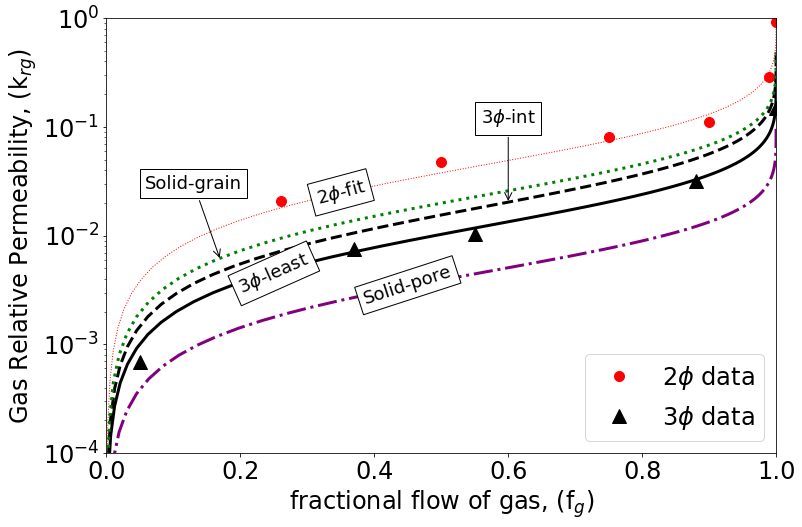

In [19]:
fig=plt.figure(figsize=(12,8))
plt.rcParams['font.size']=24
sharex='True'
plt3=fig.add_subplot(1,1,1)
plt3.semilogy(fg1,krg_nohydrate,'o',markersize=10,color='red',label='${2\phi}$ data')
plt3.semilogy(fg_h0,krg_h0,':',linewidth=1,color='red')#,label='${2\phi}$-fit')
plt3.semilogy(fg2,krg_hydrate,'^',markersize=14,color='black',label='${3\phi}$ data')
plt3.semilogy(fg_h25,krg_h25,'-',linewidth=3,color='black')#,label='${3\phi}$-least')
plt3.semilogy(fg_h25,krg_25_int,'--',linewidth=3,color='black')#,label='${3\phi}$-int')
plt3.semilogy(fg_pf,krg_pf,'-.',linewidth=3,color='purple')#,label='Solid-pore')
plt3.semilogy(fg_gc,krg_gc,':',linewidth=3,color='green')#,label='Solid-grain')


plt.xlim([0,1])
plt.xlabel('fractional flow of gas, (f$_g$)',fontsize=24)
plt.ylim([.0001,1])
plt.ylabel('Gas Relative Permeability, (k$_{rg}$)',fontsize=24)
#fig.text(0.08, 0.3, 'Gas Relative Permeability, (k$_{rg}$)',fontsize=18, ha='center', va='center', rotation='vertical')

plt.legend(loc='lower right',fontsize=24)


## FIG 2

plt3.annotate("${2\phi}$-fit",xy=(.35,.025), xycoords='data',
                 size=18, va="center", ha="center",rotation=15,
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("${3\phi}$-int",xy=(.6,.02),xytext=(0.6, 0.12),xycoords='data',
                 size=18, va="center", ha="center",rotation=0,
                arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("${3\phi}$-least",xy=(.25,.0045), xycoords='data',
                 size=18, va="center", ha="center",rotation=24,
                bbox=dict(boxstyle="square", fc="w"))

plt3.annotate("Solid-grain",xy=(.17,.006), xytext=(0.13, 0.03),xycoords='data',
                 size=18, va="center", ha="center",rotation=0,
                arrowprops=dict(arrowstyle="->"),bbox=dict(boxstyle="square", fc="w"))


plt3.annotate("Solid-pore",xy=(.45,.0035), xycoords='data',
                 size=18, va="center", ha="center",rotation=18,
                bbox=dict(boxstyle="square", fc="w"))


# plt3.annotate("B",xy=(.04,.57), xycoords='data',
#                  size=24, va="center", ha="center",
#                 bbox=dict(boxstyle="square", fc="w"))

dpi_value = 300


plt.show()